Loading libs

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import scipy
from PIL import Image
from tensorflow.keras.metrics import Accuracy



In [2]:
# Шлях до папки з даними
data_dir = "C:/Users/User/Downloads/Training"

# Встановлення розмірів зображень та кількості класів
img_width, img_height = 90, 120
num_classes = 2

# Завантаження та підготовка даних
train_data_gen = ImageDataGenerator(rescale=1./255)
train_generator = train_data_gen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary')


Found 47009 images belonging to 2 classes.


Model creation

In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [4]:

# Шлях до директорії з валідаційними даними
validation_data_dir = 'C:/Users/User/Downloads/Validation'

# Створення списків для зберігання шляхів до зображень та їх міток
image_paths = []
labels = []

# Перебір усіх піддиректорій в директорії валідаційних даних
for label in os.listdir(validation_data_dir):
    # Формування повного шляху до поточної піддиректорії
    label_dir = os.path.join(validation_data_dir, label)

    # Перевірка, чи label_dir є директорією
    if os.path.isdir(label_dir):
        for image_file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_file)

            # Додавання шляху до зображення та його мітки до відповідних списків
            image_paths.append(image_path)
            labels.append(label)

# Створення DataFrame зі списків шляхів до зображень та міток
df = pd.DataFrame({'image_path': image_paths, 'label': labels})

# Виведення перших декількох рядків DataFrame для перевірки
print(df.head())


                                          image_path   label
0  C:/Users/User/Downloads/Validation\female\1129...  female
1  C:/Users/User/Downloads/Validation\female\1129...  female
2  C:/Users/User/Downloads/Validation\female\1129...  female
3  C:/Users/User/Downloads/Validation\female\1129...  female
4  C:/Users/User/Downloads/Validation\female\1129...  female


In [5]:
# Поділ вашого DataFrame на навчальний та тестовий набори даних
validation_df, test_df = train_test_split(df, test_size=0.5, random_state=42)

# Виведення розмірів навчального та тестового наборів даних
print("К-сть файлів валідаційного набору:", validation_df.shape)
print("К-сть файлів тестового набору:", test_df.shape)

К-сть файлів валідаційного набору: (5824, 2)
К-сть файлів тестового набору: (5825, 2)


Female Images:


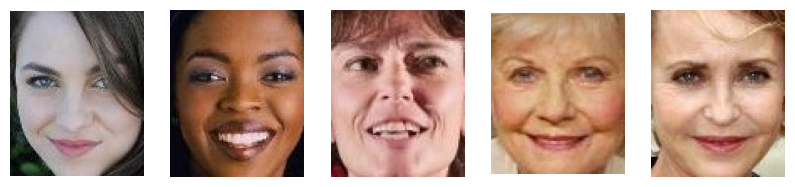

Male Images:


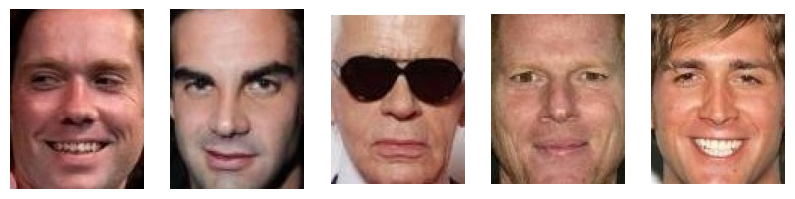

In [6]:
# Шлях до папки з зображеннями жінок
female_folder = "C:/Users/User/Downloads/Training/female"
# Шлях до папки з зображеннями чоловіків
male_folder = "C:/Users/User/Downloads/Training/male"

# Функція для виведення перших 5 зображень з папки
def show_images(folder):
    fig = plt.figure(figsize=(10, 5))
    files = os.listdir(folder)[:5]
    for i, file in enumerate(files):
        img_path = os.path.join(folder, file)
        img = mpimg.imread(img_path)
        ax = fig.add_subplot(1, 5, i+1)
        ax.imshow(img)
        ax.axis('off')
    plt.show()

# Виведення зображень для жінок
print("Female Images:")
show_images(female_folder)

# Виведення зображень для чоловіків
print("Male Images:")
show_images(male_folder)


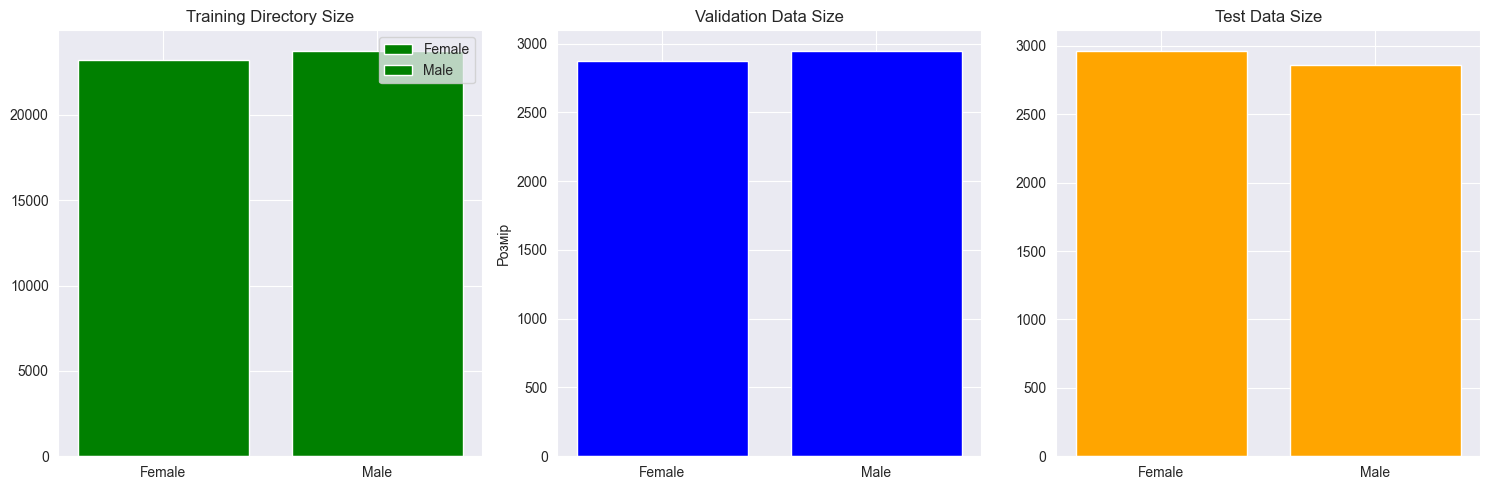

In [7]:
import matplotlib.pyplot as plt

# Розмір train_df та test_df
validation_size_female = len(validation_df[validation_df['label'] == 'female'])
validation_size_male = len(validation_df[validation_df['label'] == 'male'])

test_size_female = len(test_df[test_df['label'] == 'female'])
test_size_male = len(test_df[test_df['label'] == 'male'])

def count_images(folder):
    count = 0
    for filename in os.listdir(folder):
        if filename.endswith((".jpg", ".jpeg", ".png", ".gif")):
            count += 1
    return count

# Розмір даних з папки data_dir

data_dir_size_female = count_images(f'{data_dir}/female')
data_dir_size_male = count_images(f'{data_dir}/male')

# Створення підграфіків
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(['Female'], [data_dir_size_female], color='green')
plt.bar(['Male'], [data_dir_size_male], color='green')
plt.title('Training Directory Size')
plt.legend(['Female', 'Male'])

plt.subplot(1, 3, 2)
plt.bar(['Female'], [validation_size_female], color='blue')
plt.bar(['Male'], [validation_size_male], color='blue')
plt.ylabel('Розмір')
plt.title('Validation Data Size')

plt.subplot(1, 3, 3)
plt.bar(['Female'], [test_size_female], color='orange')
plt.bar(['Male'], [test_size_male], color='orange')
plt.title('Test Data Size')

plt.tight_layout()
plt.show()


Model summery

In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 88, 118, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 44, 59, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 57, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 21, 28, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 26, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 13, 128)       0

# Model learning

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

validation_data_generator = ImageDataGenerator(rescale=1./255)
batch_size = 32
# Створення генератора даних для валідаційного набору
validation_generator = validation_data_generator.flow_from_dataframe(
    dataframe=validation_df, 
    x_col='image_path',  
    y_col='label',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples/validation_generator.batch_size
)

# Отримання значень втрати та точності на валідаційному наборі після тренування
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']


Found 5824 validated image filenames belonging to 2 classes.
Epoch 1/10
1469/1469 [==============================] - 478s 324ms/step - loss: 0.2417 - accuracy: 0.8964 - val_loss: 0.1665 - val_accuracy: 0.9354
Epoch 2/10
1469/1469 [==============================] - 475s 324ms/step - loss: 0.1496 - accuracy: 0.9445 - val_loss: 0.1785 - val_accuracy: 0.9251
Epoch 3/10
1469/1469 [==============================] - 474s 323ms/step - loss: 0.1291 - accuracy: 0.9527 - val_loss: 0.1243 - val_accuracy: 0.9560
Epoch 4/10
1469/1469 [==============================] - 481s 327ms/step - loss: 0.1173 - accuracy: 0.9577 - val_loss: 0.1137 - val_accuracy: 0.9595
Epoch 5/10
1469/1469 [==============================] - 479s 326ms/step - loss: 0.1093 - accuracy: 0.9608 - val_loss: 0.1160 - val_accuracy: 0.9595
Epoch 6/10
1469/1469 [==============================] - 476s 324ms/step - loss: 0.1006 - accuracy: 0.9636 - val_loss: 0.1105 - val_accuracy: 0.9572
Epoch 7/10
1469/1469 [=============================

In [10]:
directory = "D:/IntelegentSystems/model"
model.save(directory)

INFO:tensorflow:Assets written to: D:/IntelegentSystems/model\assets


INFO:tensorflow:Assets written to: D:/IntelegentSystems/model\assets


Training and validation accuracy
Training and validation loss

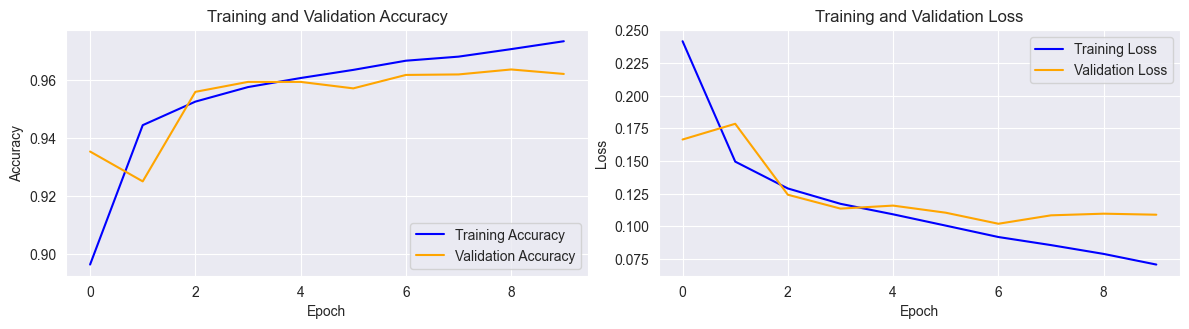

In [15]:
import matplotlib.pyplot as plt

# Отримання значень точності та втрати під час навчання
training_accuracy = history.history['accuracy']
#validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
#validation_loss = history.history['val_loss']

# Створення графіків точності
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(training_accuracy, label='Training Accuracy', color='blue')
plt.plot(validation_accuracy, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Створення графіків втрати
plt.subplot(2, 2, 2)
plt.plot(training_loss, label='Training Loss', color='blue')
plt.plot(validation_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Testing

In [12]:

# Завантаження моделі з файлу
modelSaved = load_model("D:/IntelegentSystems/model")

# Параметри для генерації зображень для тестового набору
test_data_generator = ImageDataGenerator(rescale=1./255)  # Повторне масштабування значень пікселів

# Створення генератора даних для тестового набору
test_generator = test_data_generator.flow_from_dataframe(
    dataframe=test_df,  
    x_col='image_path',
    y_col='label',  
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Якщо у вас є тестові дані, ви можете використати їх для оцінки моделі
test_loss, test_accuracy = modelSaved.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Found 5825 validated image filenames belonging to 2 classes.
183/183 [==============================] - 26s 140ms/step - loss: 0.1152 - accuracy: 0.9586
Test Loss: 0.115203358232975
Test Accuracy: 0.9586266279220581


Сondution matrix

183/183 [==============================] - 20s 107ms/step


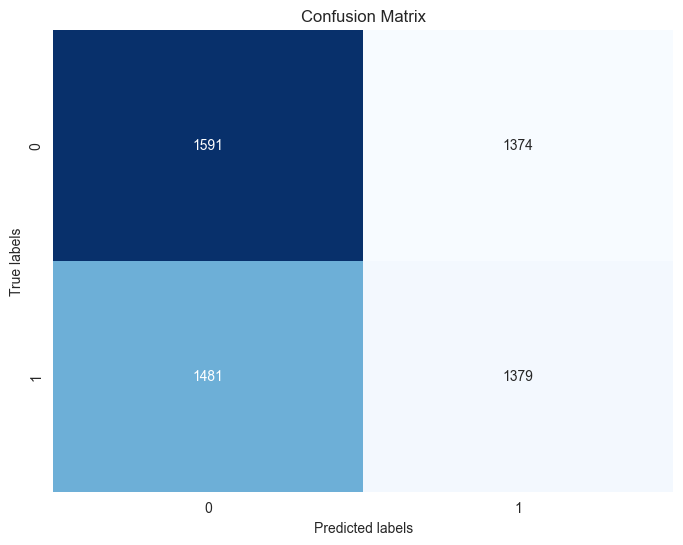

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Здійснення передбачень на тестових даних
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int)  # Бінарізація передбачень (0 або 1)

# Отримання міток класів для тестових даних
true_classes = test_generator.classes

# Створення матриці плутанини
confusion_mat = confusion_matrix(true_classes, predicted_classes)

# Відображення матриці плутанини у вигляді теплової карти
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
